In [1]:
"""
Simple method
"""
#import libraries

from scipy.stats import poisson ## to calculate the passion distribution
import numpy as np ## to prepare the data
import pandas as pd ## to prepare the data
import matplotlib.pyplot as plt ## to create plots

In [8]:
#Random Example: Modeling the frequency of the number of collision for UW robot in Gazebo 

#creating data for 10000 times using scipy.stat.poisson library
#Rate lamda = 2.5 collision occured for robot's collision

d_rvs = pd.Series(poisson.rvs(4.5, size=10000, random_state=2)) #random_state so we can reproduce it #turning into panda series
d_rvs[:20] # first 20 entry, so the first 20 times, with the number of collision on the right

0     2
1     4
2     4
3     6
4     3
5     3
6     3
7     6
8     7
9     5
10    2
11    5
12    4
13    3
14    5
15    1
16    2
17    5
18    3
19    6
dtype: int64

In [9]:
d_rvs.mean() # mean of 10000 values is 3.2.4905, approximately what we set as the average number of collision  per one time.

4.5064

In [10]:
#showing the frequency of times against the number of collision per time and sorting it by index. 
data = d_rvs.value_counts().sort_index().to_dict() #storing in a dictionary
data
## You can see that most times have 2-4 collision which is also represented in the calculated average and our lambda.

{0: 109,
 1: 520,
 2: 1139,
 3: 1636,
 4: 1849,
 5: 1727,
 6: 1327,
 7: 863,
 8: 424,
 9: 230,
 10: 108,
 11: 44,
 12: 18,
 13: 3,
 14: 2,
 15: 1}

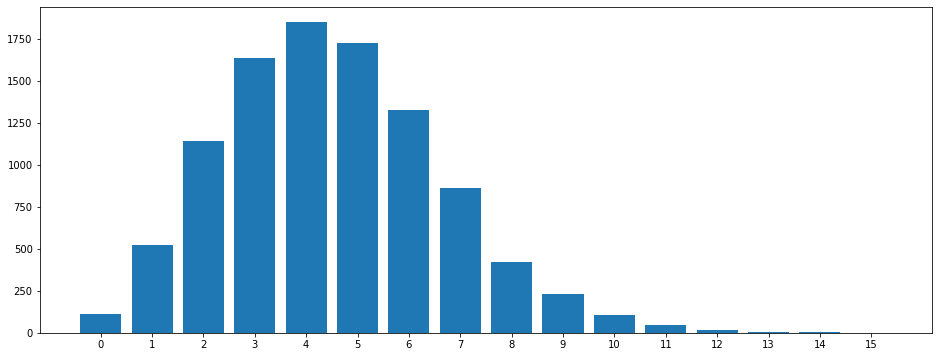

In [12]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

The probability density function (pdf) for an exponential distribution is given by the equation:

$f(x, \lambda) = \lambda.e^{-\lambda.x}$   $x=>0$

where:

$\lambda$ = rate at which an event occurs

$X$ = random variable (time between 2 events)

$f(x; \lambda)$ = probability of time between 2 events being x units



/tmp/ipykernel_68285/3527832961.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g.-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(k_values, pmf_values2, 'g.-', linewidth=2, label=r"$R_1 \sim$" + " Poisson" + fr"$\left({lambda2}\right)$", color ='g', zorder =20)
/tmp/ipykernel_68285/3527832961.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_values, pmf_values1, 'b.-', linewidth=2, label=r"$R_2 \sim$" + " Poisson" + fr"$\left({lambda1}\right)$", color ='b', zorder =25)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.0009990009990009986


0.0009990009990010012
Mean=3.000,Variance=3.000, Skew=0.577
Entropy=1.931
Mean=8.000,Variance=8.000, Skew=0.354
Entropy=2.447


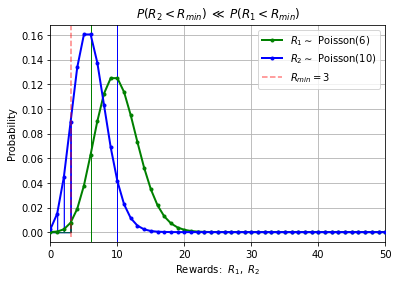

In [3]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Set the Poisson parameter and the range of k values
lambda2 = 6
k_values = np.arange(0, 1001)
lambda1 = 10

min_failure = 3

# Calculate the PMF using the Scipy library
pmf_values2 = poisson.pmf(k_values, lambda1)
mu2 = pmf_values2.mean()
pmf_values1 = poisson.pmf(k_values, lambda2)
mu1 = pmf_values1.mean()
print(mu1)
print('\n')
print(mu2)
# mu = lambda2
mu = 3 
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print('Mean=%.3f,Variance=%.3f, Skew=%.3f'%(mean,var, skew) )
print('Entropy=%.3f'%poisson.entropy(mu, loc=0)) 

# mu = lambda1
mu = 8
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print('Mean=%.3f,Variance=%.3f, Skew=%.3f'%(mean,var, skew) )
print('Entropy=%.3f'%poisson.entropy(mu, loc=0)) 

x_fail = np.linspace(0, min_failure, 10000)

y2_fail = poisson.pmf(x_fail, lambda2)
y1_fail = poisson.pmf(x_fail, lambda1)


# Plot the PMF using Matplotlib
# plt.plot(k_values, pmf_values, 'g.-', linewidth=2, label='$\lambda_1$=%d'%lambda1, color ='g', zorder=20)
plt.plot(k_values, pmf_values2, 'g.-', linewidth=2, label=r"$R_1 \sim$" + " Poisson" + fr"$\left({lambda2}\right)$", color ='g', zorder =20)

plt.plot(k_values, pmf_values1, 'b.-', linewidth=2, label=r"$R_2 \sim$" + " Poisson" + fr"$\left({lambda1}\right)$", color ='b', zorder =25)
# label=r"$R_1 \sim$" + " norm" + fr"$\left( {m1}, {s1}^2 \right)$", zorder=20
plt.xlabel('Rewards:  ' + r'$R_1, \; R_2$')
plt.ylabel('Probability')

plt.xlim(0, 50)
plt.axvline(lambda2, color='g', linewidth=1)
plt.axvline(lambda1, color='b', linewidth=1)
plt.axvline(x=min_failure, linestyle='dashed', color='r', alpha=0.5, ymin=0.025, ymax=0.995, label=r"$R_{min} = $" + f"{min_failure}", zorder=30)
plt.fill_between(x_fail, y2_fail, color='b', alpha=0.93, zorder=10)
plt.fill_between(x_fail, y1_fail, color='g', alpha=0.67, zorder=15)

plt.title(r"$P\left(R_2 < R_{min}\right) \; \ll  \; P\left(R_1 < R_{min}\right)$")
plt.grid(True)
plt.legend()
plt.savefig('poisson_distribution.eps', format='eps', dpi = 300)
plt.show();